# WeatherPy
----

#### Oservations:
*  include a written description of three observable trends based on the data

In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
import scipy.stats as st
import os


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
################### NOTE #########################
#####code provided by professor in this block
##################################################

# List for holding lat_lngs and cities values
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

################### END BLOCK ####################
##################################################

622

In [3]:
#putting the cities from the api into a dataframe

city_df = pd.DataFrame({'City' : cities})
city_df

,City
0,abadan
1,saint-philippe
2,hasaki
3,vaitupu
4,georgetown
...,...
617,yangambi
618,pacific grove
619,nanakuli
620,halalo


### API Calls

In [4]:
# API key
from api_keys import weather_api_key

#url
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

In [5]:
city_name_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
cloud_list = []
wind_list = []
country_list = []
date_list = []



#record and set number initilization
record_num = 1
set_num = 1


print('Beginning Data Retrieval')
print('-----------------------------')


for city in cities:
   
    #parameters
    params ={'location': 'en', 
             'units' : 'imperial',
             'q' : city,
             'APPID': weather_api_key}
      
    #try statement to test for each city --> appending city values if found
    try:
        
        # run a request using our params dictionary
        response = requests.get(base_url, params=params)
        data = response.json()     
        
        #appending city values ti
        lng_list.append(data['coord']['lon'])
        lat_list.append(data['coord']['lat'])
        temp_list.append(data['main']['temp'])
        humidity_list.append(data['main']['humidity'])
        cloud_list.append(data['clouds']['all'])
        wind_list.append(data['wind']['speed'])
        city_name_list.append(data['name'])
        date_list.append(data['dt']) 
        country_list.append(data['sys']['country']) 
        
        print(f'Processing Record {record_num} of Set {set_num} | {city}')  
    
    except KeyError:
        print("City not found. Skipping..")
    
    # Setting Api call limt to 50 per set
    if record_num == 50:
            set_num += 1
            record_num = 1
    
    record_num += 1
        
print('End of Data Retrieval')
print('-----------------------------')
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | abadan
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | hasaki
City not found. Skipping..
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | madimba
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | torbay
City not found. Skipping..
Processing Record 15 of Set 1 | sedlcany
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | san cristobal
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | udachnyy
Processing Record 20 of Set 1 | mandurah
City not found. Skipping..
Processing Record 22 of Set 1 | chimbote
Processing Record 23 of Set 1 | mataura
City not found. Skipping..
City not found. Skipp

Processing Record 10 of Set 5 | jaitaran
Processing Record 11 of Set 5 | siuna
Processing Record 12 of Set 5 | hatfield
City not found. Skipping..
Processing Record 14 of Set 5 | hami
Processing Record 15 of Set 5 | bathsheba
Processing Record 16 of Set 5 | tacna
Processing Record 17 of Set 5 | ko samui
Processing Record 18 of Set 5 | ornskoldsvik
Processing Record 19 of Set 5 | ust-kut
Processing Record 20 of Set 5 | keetmanshoop
Processing Record 21 of Set 5 | tuatapere
Processing Record 22 of Set 5 | fairbanks
City not found. Skipping..
Processing Record 24 of Set 5 | batagay-alyta
Processing Record 25 of Set 5 | margate
Processing Record 26 of Set 5 | opuwo
Processing Record 27 of Set 5 | namibe
Processing Record 28 of Set 5 | alofi
Processing Record 29 of Set 5 | omsukchan
Processing Record 30 of Set 5 | arraial do cabo
Processing Record 31 of Set 5 | vila franca do campo
City not found. Skipping..
Processing Record 33 of Set 5 | kahului
Processing Record 34 of Set 5 | pampierstad

Processing Record 19 of Set 9 | bukama
Processing Record 20 of Set 9 | xinxiang
Processing Record 21 of Set 9 | safaga
Processing Record 22 of Set 9 | yayva
Processing Record 23 of Set 9 | aklavik
Processing Record 24 of Set 9 | gwadar
Processing Record 25 of Set 9 | eyl
Processing Record 26 of Set 9 | marsaxlokk
Processing Record 27 of Set 9 | jinchang
City not found. Skipping..
Processing Record 29 of Set 9 | kasempa
Processing Record 30 of Set 9 | cabo san lucas
Processing Record 31 of Set 9 | waddan
Processing Record 32 of Set 9 | salekhard
Processing Record 33 of Set 9 | remedios
Processing Record 34 of Set 9 | seymchan
Processing Record 35 of Set 9 | palembang
Processing Record 36 of Set 9 | kathmandu
Processing Record 37 of Set 9 | svetogorsk
Processing Record 38 of Set 9 | gorontalo
Processing Record 39 of Set 9 | laguna
Processing Record 40 of Set 9 | llodio
Processing Record 41 of Set 9 | solwezi
Processing Record 42 of Set 9 | kijang
Processing Record 43 of Set 9 | yellapur


Processing Record 25 of Set 13 | acarau
Processing Record 26 of Set 13 | huittinen
Processing Record 27 of Set 13 | pierre
Processing Record 28 of Set 13 | jhargram
Processing Record 29 of Set 13 | ellisras
Processing Record 30 of Set 13 | yangambi
Processing Record 31 of Set 13 | pacific grove
Processing Record 32 of Set 13 | nanakuli
City not found. Skipping..
Processing Record 34 of Set 13 | turbat
End of Data Retrieval
-----------------------------


### Convert Raw Data to DataFrame


In [6]:
# set up additional columns to hold information
weather_df = pd.DataFrame({'City' : city_name_list,
                           'Lat' : lat_list,
                           'Lng' : lng_list,
                           'Max Temp' : temp_list,
                           'Humidity' : humidity_list,
                           'Cloudiness' : cloud_list,
                           'Wind Speed' : wind_list,
                           'Country' : country_list,
                           'Date' : date_list})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ābādān,30.34,48.30,80.60,24,0,5.41,IR,1603382779
1,Saint-Philippe,-21.36,55.77,74.35,73,0,20.80,RE,1603382399
2,Hasaki,35.73,140.83,61.66,100,75,5.82,JP,1603382121
3,George Town,5.41,100.34,77.63,83,20,3.36,MY,1603382300
4,Chui,-33.70,-53.46,61.43,81,100,15.32,UY,1603382424
...,...,...,...,...,...,...,...,...,...
564,Ellisras,-23.66,27.74,86.56,23,0,6.67,ZA,1603382903
565,Yangambi,0.81,24.43,74.64,95,99,1.66,CD,1603382904
566,Pacific Grove,36.62,-121.92,55.38,100,90,5.82,US,1603382231
567,Nānākuli,21.39,-158.15,72.09,94,1,1.50,US,1603382904


## Exporting to CSV File

In [7]:
# Output File (CSV)
weather_df.to_csv("output_data/weatherpy/cities.csv", index=False, encoding='utf-8')

## Inspect the data and remove the cities where the humidity > 100%.
     Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [9]:
print([weather_df['Humidity'] > 100])

[0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Name: Humidity, Length: 569, dtype: bool]


--> step skipped since no cities over 100% humidity

In [10]:
weather_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,19.916520,21.915132,61.661072,70.896309,49.910369,7.970000,1.603383e+09
std,33.905279,88.565245,21.889571,22.094423,38.925001,5.597358,2.587743e+02
min,-54.800000,-175.200000,2.350000,1.000000,0.000000,0.380000,1.603382e+09
25%,-8.770000,-57.750000,47.980000,60.000000,5.000000,3.360000,1.603382e+09
50%,25.930000,25.540000,66.430000,77.000000,53.000000,6.930000,1.603383e+09
75%,48.610000,99.940000,78.390000,87.000000,90.000000,11.010000,1.603383e+09
max,78.220000,178.420000,106.340000,100.000000,100.000000,36.820000,1.603383e+09


## Plotting the Data


## Latitude vs. Temperature Plot

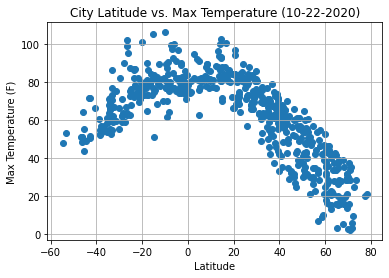

In [11]:
#Scatterplot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = "o")

#labeling
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

#exporting plot as png
plt.savefig("output_data/weatherpy/ fig 1 - Latitude_V_Temperature.png")

#printing
plt.show()

# Using a function to plot remaining plots

In [12]:
#using a function to plot scatter plots

def plotting_data(x_axis, y_axis, x_lab, y_lab, title, savename):
    
    #scatterplot
    plt.scatter(x_axis, y_axis, marker = "o")
    plt.grid(True)

    #labeling
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    
    #sizing
    plt.tight_layout
    
    
    #exporting plot as png
    plt.savefig(f"output_data/weatherpy/{savename}.png")
    
    #printing
    plt.show()  
    

## Latitude vs. Humidity Plot

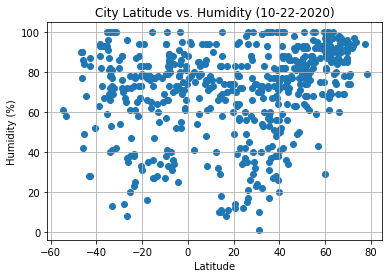

In [13]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity (%)'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 2 - Latitude_V_Humidity'

#function
plotting_data(weather_df['Lat'], weather_df['Humidity'], x_lab, y_lab, title, savename)

## Latitude vs. Cloudiness Plot

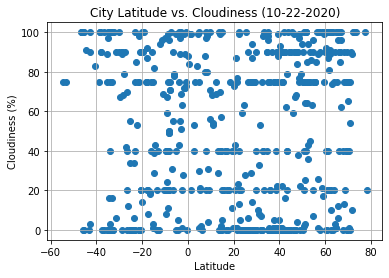

In [14]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness (%)'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 3 - Latitude_V_Cloudiness'

#function
plotting_data(weather_df['Lat'], weather_df['Cloudiness'], x_lab, y_lab, title, savename)

## Latitude vs. Wind Speed Plot

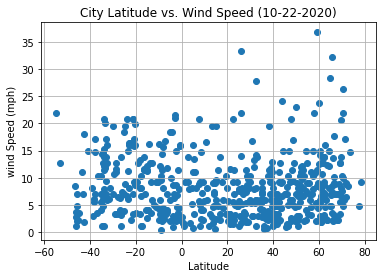

In [15]:
#labeling
x_lab = 'Latitude'
y_lab = 'wind Speed (mph)'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 4 - Latitude_V_Wind_speed'

#function
plotting_data(weather_df['Lat'], weather_df['Wind Speed'], x_lab, y_lab, title, savename)

## Linear Regression

In [16]:
#finding Northern and southern cities based on Latitude
northern_cities = weather_df.loc[weather_df['Lat'] > 0.00]
southern_cities = weather_df.loc[weather_df['Lat'] < 0.00]

#resetting their indexes
northern_cities.reset_index(inplace = True)
southern_cities.reset_index(inplace = True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-Value is: -0.8813425434825226


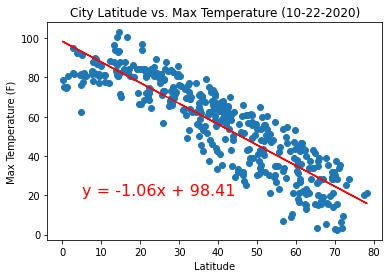

In [17]:
#Scatterplot
plt.scatter(northern_cities['Lat'], northern_cities['Max Temp'], marker = "o")

#labeling
plt.title(f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#linear Regression
(slope, intercept, rvalue, pvalue, std_err) = linregress(northern_cities['Lat'], northern_cities['Max Temp'])

#line formula --> y=mx+b
reg_val = northern_cities['Lat'] * slope + intercept
lineeq = f'y = {round(slope,2)}x + {round(intercept,2)}'

#line plotting
plt.plot(northern_cities['Lat'], reg_val, color='r')
plt.annotate(lineeq, (5,20), color='red', fontsize=16)

#exporting plot as png
plt.savefig("output_data/weatherpy/fig 5 - LinearREG-Lat_V_Temp - North.png")

#printing
print(f'The r-Value is: {rvalue}')
plt.show()


# Using a function to plot remaining plots

In [18]:
#using a function to plot scatter plots with linear regression

def line_reg_plotting(x_axis, y_axis, x_lab, y_lab, title, savename,linepos):
    
    #linear Regression
    (slope, intercept, rvalue, pvalue, std_err) = linregress(x_axis, y_axis)
    
    #line formula --> y=mx+b
    reg_val = x_axis * slope + intercept
    lineeq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    
    #scatterplot and lineplot
    plt.scatter(x_axis, y_axis, marker = "o")
    plt.plot(x_axis, reg_val, color='r')
    plt.annotate(lineeq, linepos, color='red',fontsize = 16)
    
    
    #labeling
    plt.title(title)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    
    #exporting plot as png
    plt.savefig(f"output_data/weatherpy/{savename}.png")
    
    #printing
    print(f'The r-Value is: {rvalue}')
    plt.show()  
    


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-Value is: 0.6705773334408188


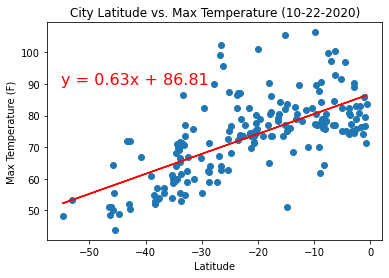

In [19]:
#labeling
x_lab = 'Latitude'
y_lab = 'Max Temperature (F)'
title = f'City Latitude vs. Max Temperature ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 6 - LinearREG-Lat_V_Temp - South.png'

#line equation position
linepos = (-55,90)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Max Temp'], x_lab, y_lab, title, savename,linepos)  


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-Value is: 0.3721735280401036


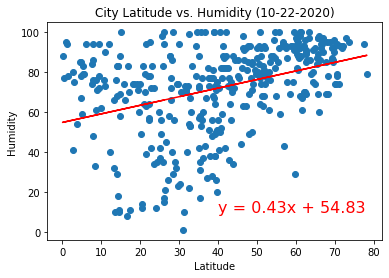

In [20]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 7 - LinearREG-Lat_V_Humid - North.png'

#line equation position
linepos = (40,10)

#labeling #saving #line equation position #function
line_reg_plotting(northern_cities['Lat'], northern_cities['Humidity'], x_lab, y_lab, title, savename, linepos)  
    
    

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-Value is: -0.022360068204776373


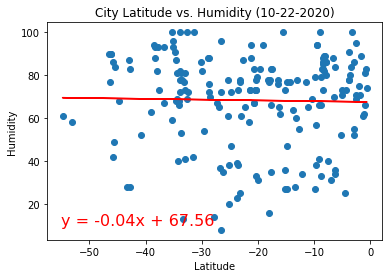

In [21]:
#labeling
x_lab = 'Latitude'
y_lab = 'Humidity'
title = f'City Latitude vs. Humidity ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 8 - LinearREG-Lat_V_Humid - South.png'

#line equation position
linepos = (-55,10)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Humidity'], x_lab, y_lab, title, savename, linepos)  
    

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-Value is: 0.1948220347049943


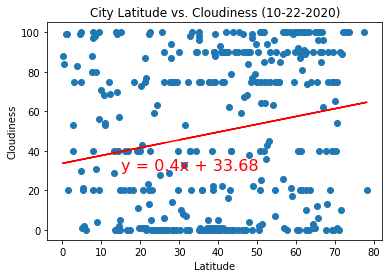

In [22]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 9 - LinearREG-Lat_V_Cloud - North.png'

#line equation position
linepos = (15,30)

#function
line_reg_plotting(northern_cities['Lat'], northern_cities['Cloudiness'], x_lab, y_lab, title, savename, linepos)  
    

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-Value is: -0.029700340055436748


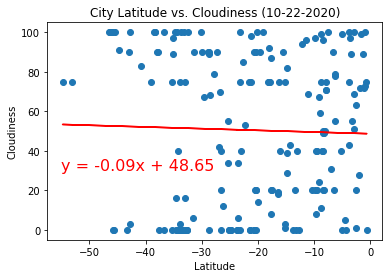

In [23]:
#labeling
x_lab = 'Latitude'
y_lab = 'Cloudiness'
title = f'City Latitude vs. Cloudiness ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 10 - LinearREG-Lat_V_Cloud - South.png'

#line equation position
linepos = (-55,30)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Cloudiness'], x_lab, y_lab, title, savename, linepos)  
    

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-Value is: 0.16215188690252916


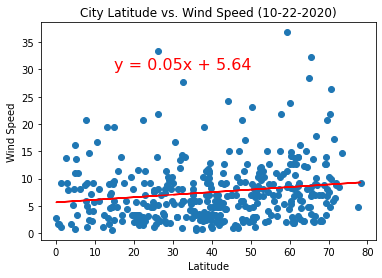

In [24]:
#labeling
x_lab = 'Latitude'
y_lab = 'Wind Speed'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 11 - LinearREG-Lat_V_Wind - North.png'

#line equation position
linepos = (15,30)

#function
line_reg_plotting(northern_cities['Lat'], northern_cities['Wind Speed'], x_lab, y_lab, title, savename, linepos)  
    

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-Value is: -0.0944369005734259


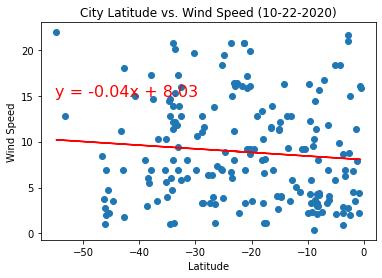

In [26]:
#labeling
x_lab = 'Latitude'
y_lab = 'Wind Speed'
title = f'City Latitude vs. Wind Speed ({time.strftime("%m-%d-%Y")})'

#saving
savename = 'fig 12 - LinearREG-Lat_V_Wind - North.png'

#line equation position
linepos = (-55,15)

#function
line_reg_plotting(southern_cities['Lat'], southern_cities['Wind Speed'], x_lab, y_lab, title, savename, linepos)  
    